In [1]:
import os
import re
import codecs
from settings import Settings
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords   


In [43]:
def read_docs():
    s = Settings()
    list_files = os.listdir(os.path.join(s.path, "textos"))
    list_docs = [readText(x, s) for x in list_files]
    return list_docs, list_files
l_docs, l_files = read_docs()

In [44]:
def readText(file_name, s):
        text = ""
        with codecs.open(os.path.join(s.path, "textos", file_name), "r", "UTF-8") as handle:
           for line in handle.readlines():
               line = line.lower()
               line = re.sub("[0-9]+", "", line)
               line = re.sub("[_]+", "", line)
               text += " " + line
        line = re.sub("\s+", " ", text)
        return text

def get_stop_words():
    stop_words_direito = ['impressao','artigo','direita', 'processo','sentenca','documento','digitalmente','direito', 'juiz','nao','autos','lauda','margem']
    stop_words_direito = stop_words_direito + stopwords.words("portuguese")
    return stop_words_direito

def tdm(list_docs, list_files):
    vectorizer = CountVectorizer(strip_accents="unicode", max_df =0.8, stop_words=get_stop_words())
    x1 = vectorizer.fit_transform(list_docs)
    df = pd.DataFrame(x1.toarray().transpose(), index=vectorizer.get_feature_names())
    df.columns = list_files
    return df


    

In [45]:
p = tdm(l_docs, l_files)
print(p.shape)

(25816, 10836)


In [46]:
word_count = p.sum(1)

In [47]:
total_words = word_count.sum(0)

In [48]:
word_count2 = word_count/total_words

In [49]:
wc = WordCloud(background_color="white", max_words=2000)

In [50]:
wc.generate_from_frequencies(word_count2.to_dict())


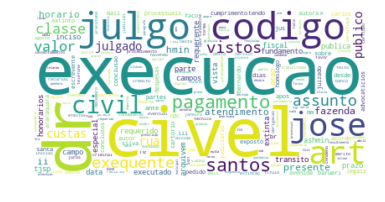

In [51]:
plt.figure()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()